## PyNormaliz

Normaliz is a tool for computing the Hilbert bases and enumerative data of rational cones and, more generally, sets of lattice points in rational polyhedra.

### Example 1: A cone in dimension 2

We want to investigate the cone $C=\mathbb{R}_{+}(2,1)+\mathbb{R}_{+}(1,3)\subset\mathbb{R}^2$:

This cone is defined in the input file 2cone.in:

<pre>
amb_space 2 
cone 2
1 3
2 1
</pre>

The input tells Normaliz that the ambient space is R2, and then a cone with 2 generators is defined, namely the cone C from above.
The figure indicates the Hilbert basis, and this is our first computation goal.
If you prefer to consider the columns of a matrix as input vectors (or have got a matrix in this format from another system) you can use the input

Calculate the Hilbert basis from finite vectors.

theta 0.314159265359
ratio 3.07768353718
integers 277/90
new vector [[277, 90], [1, 4]]


/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


('Hilbert Bases:',
 [[1L, 1L],
  [1L, 2L],
  [1L, 3L],
  [1L, 4L],
  [2L, 1L],
  [3L, 1L],
  [40L, 13L],
  [277L, 90L]])

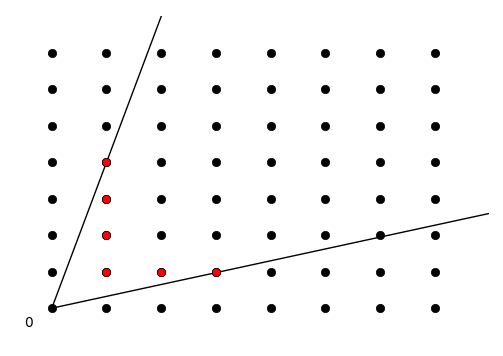

In [1]:
%pylab inline

import PyNormaliz
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed
from IPython.display import display
from fractions import Fraction

vectors = [[2,1],[1,4]]
cone = PyNormaliz.NmzCone("cone",vectors)
HB = PyNormaliz.NmzResult(cone,"HilbertBasis")
    
# Draw background lattice.
xLattice = np.arange(-1,8)
yLattice = np.arange(-1,8)

def pltHilbertBasis(theta=np.pi/10):
    fig,ax = plt.subplots()
    plt.ylim([-0.5,8])
    plt.xlim([-0.5,8])
    ax.axis('off')
    vectors[0][0],vectors[0][1] = np.cos(theta)*2, np.sin(theta)*2
    print ("theta",theta)
    ratio = vectors[0][0] / vectors[0][1]
    print ("ratio",ratio)
    integers = Fraction.from_float(ratio).limit_denominator(100)
    print ("integers", integers)
    # TODO: Solve for >2 dimensions.
    # for ind,d in enumerate(vectors[0]): 
    #     integers = Fraction.from_float(d).limit_denominator(100)

    vectors[0][0] = integers.numerator
    vectors[0][1] = integers.denominator
    print ("new vector", vectors)
    for x in xLattice:
        for y in yLattice:
            plt.plot(x,y,'ko')

    # Plot bounding vectors.
    for v in vectors:
        ax.plot([0,v[0]*2],[0,v[1]*2],'k-')
    
    cone = PyNormaliz.NmzCone("cone",vectors)
    HB = PyNormaliz.NmzResult(cone,"HilbertBasis")
    xList = [x for x,y in HB]
    yList = [y for x,y in HB]

    # TODO: Complete fill_between function.
    # x = np.arange(0,0.1,2)
    # y1 = x*2
    # y2 = x*3
    # ax.fill_between(x,y1,y2,where=y2>=y1,facecolor='green', interpolate=True)
    # Plot Hilbert basis.
    ax.plot(xList,yList,'ro')
    ax.annotate(str(0), (-.5,-.5))
    gcf().show()
    return "Hilbert Bases:", HB

w = interactive(pltHilbertBasis, theta=(0.01,np.pi/2,np.pi/40))
display(w)

### Grading
Now we would also like to define a grading for our cone, which in this example will be the total grading.

In [ ]:
vectors = [[2,1],[1,4]]
grading = [[1,1]]
cone2 = PyNormaliz.NmzCone(["cone",vectors,"grading",grading])
PyNormaliz.NmzResult(cone2,"HilbertSeries")

In [ ]:
PyNormaliz.NmzResult(cone2,"HilbertQuasiPolynomial")

### Magic Squares

Suppose that you are interested in the following type of “square”

This system is encoded in the file 3x3magic.in:

and the problem is to find nonnegative values for x1,...,x9 such that the 3 numbers in all rows, all columns, and both diagonals sum to the same constant M . Sometimes such squares are called magic and M is the magic constant. This leads to a linear system of equations

|    |    |    |
|----|----|----|
| x1 | x2 | x3 |
| x4 | x5 | x6 |
| x7 | x8 | x9 |

<pre>
amb_space 9
equations 7
1 1 1 -1 -1 -1  0  0  0
1 1 1  0  0  0 -1 -1 -1
0 1 1 -1  0  0 -1  0  0
1 0 1  0 -1  0  0 -1  0
1 1 0  0  0 -1  0  0 -1
0 1 1  0 -1  0  0  0 -1
1 1 0  0 -1  0 -1  0  0
grading
sparse 1:1 2:1 3:1;
</pre>

The input type equations represents homogeneous equations. The first equation reads
$$x1 + x2 + x3 − x4 − x5 − x6 = 0,$$

and the other equations are to be interpreted analogously. The magic constant is a natural choice for the grading. It is given in sparse form, equivalent to the dense form

<pre>
grading
1 1 1 0 0 0 0 0 0
</pre>

In [11]:
# Use Normaliz example input files.
# with open('examples/3x3magic.in','r') as f:
#     parameters = f.readlines()

# # Strip paramters from input file.
amb_space = parameters[0].split('amb_space')[1]
equations = [[int(x) for x in i.replace('\n','').replace('  ',' ').split(' ')] for i in parameters[2:9]]

# TODO: Create function that maps sparse grading from input file into dense form.
grading = [[1,1,1,0,0,0,0,0,0]]
print(equations)

cone = PyNormaliz.NmzCone(["equations",equations,"grading",grading])
HB = PyNormaliz.NmzResult(cone,"HilbertBasis")

[[1, 1, 1, -1, -1, -1, 0, 0, 0], [1, 1, 1, 0, 0, 0, -1, -1, -1], [0, 1, 1, -1, 0, 0, -1, 0, 0], [1, 0, 1, 0, -1, 0, 0, -1, 0], [1, 1, 0, 0, 0, -1, 0, 0, -1], [0, 1, 1, 0, -1, 0, 0, 0, -1], [1, 1, 0, 0, -1, 0, -1, 0, 0]]
[[0L, 2L, 1L, 2L, 1L, 0L, 1L, 0L, 2L], [1L, 0L, 2L, 2L, 1L, 0L, 0L, 2L, 1L], [1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L], [1L, 2L, 0L, 0L, 1L, 2L, 2L, 0L, 1L], [2L, 0L, 1L, 0L, 1L, 2L, 1L, 2L, 0L]]


In [53]:
def magic_square(n):
    equation = [1 if x<n else 0 for x in range(n**2)]
    eqs = []

    for i in range(1,n):
        equation = [1 if x<n else 0 for x in range(n**2)]
        for j in range(n):
            equation[i * n + j] = -1
        eqs.append(equation)

    for i in range(n):
        equation = [1 if x<n else 0 for x in range(n**2)]
        equation[i] = 0
        for j in range(1,n):
            equation[n*j + i] = -1
        eqs.append(equation)

    equation = [1 if x<n else 0 for x in range(n**2)]
    diagonal = equation
    anti_diagonal = list(equation)
    diagonal[0] = 0
    anti_diagonal[n-1]=0

    for i in range(1, n):
        diagonal[n*i+i] = -1
        anti_diagonal[n*i+i] = -1
    eqs.append(diagonal)
    eqs.append(anti_diagonal)
    return eqs

eqs = magic_square(3)

for line in eqs:
    print(line)

[1, 1, 1, -1, -1, -1, 0, 0, 0]
[1, 1, 1, 0, 0, 0, -1, -1, -1]
[0, 1, 1, -1, 0, 0, -1, 0, 0]
[1, 0, 1, 0, -1, 0, 0, -1, 0]
[1, 1, 0, 0, 0, -1, 0, 0, -1]
[0, 1, 1, 0, -1, 0, 0, 0, -1]
[1, 1, 0, 0, -1, 0, 0, 0, -1]
